### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Analisis General:

In [2]:
#Ingreso total por tienda
iTotal1 = tienda['Precio'].sum()
iTotal2 = tienda2['Precio'].sum()
iTotal3 = tienda3['Precio'].sum()
iTotal4 = tienda4['Precio'].sum()

#Lo añadimos a un diccionario
ingresos = {
    "Tienda 1": iTotal1,
    "Tienda 2": iTotal2,
    "Tienda 3": iTotal3,
    "Tienda 4": iTotal4
}

#guardamos la tienda con menor venta
tiendaMenor = min(ingresos, key=ingresos.get)

#Imprimimos la tienda con menor venta
print(f"La tienda con menor venta es la {tiendaMenor} con: {ingresos[tiendaMenor]}$")

La tienda con menor venta es la Tienda 4 con: 1038375700.0$


Gráficamente:

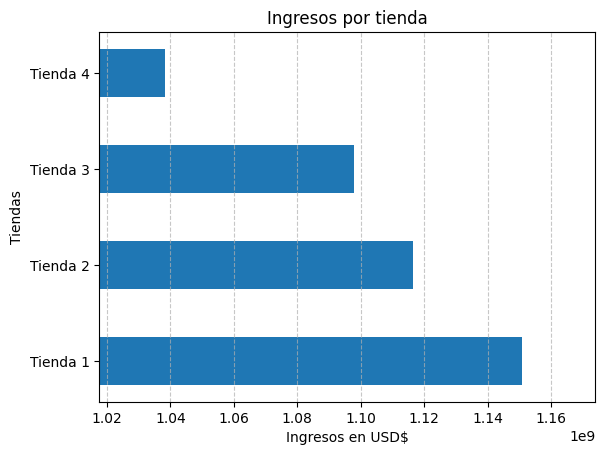

In [3]:
#Separamos valores para el gráfico
nombreTienda = list(ingresos.keys())
ingresoTienda = list(ingresos.values())

#Armamos la gráfica
plt.barh(nombreTienda, ingresoTienda, height=0.5)
plt.title("Ingresos por tienda")
plt.xlabel("Ingresos en USD$")
plt.ylabel("Tiendas")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(min(ingresoTienda) * 0.98, max(ingresoTienda) * 1.02)  #Para visualizar mejor la diferencia
plt.show()



# 2. Ventas por categoría

Análisis General:

In [ ]:
#Agregamos las tiendas a un diccionario:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, data in tiendas.items():
  ventas_categoria = data.groupby("Categoría del Producto").size().sort_values(ascending=False)
  print(f"{nombre} - Categorías más vendidas:")
  print(ventas_categoria, "\n")

Tienda 1 - Categorías más vendidas:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64 

Tienda 2 - Categorías más vendidas:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64 

Tienda 3 - Categorías más vendidas:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64 

Tienda 4 - Categorías más vendidas

Grafico

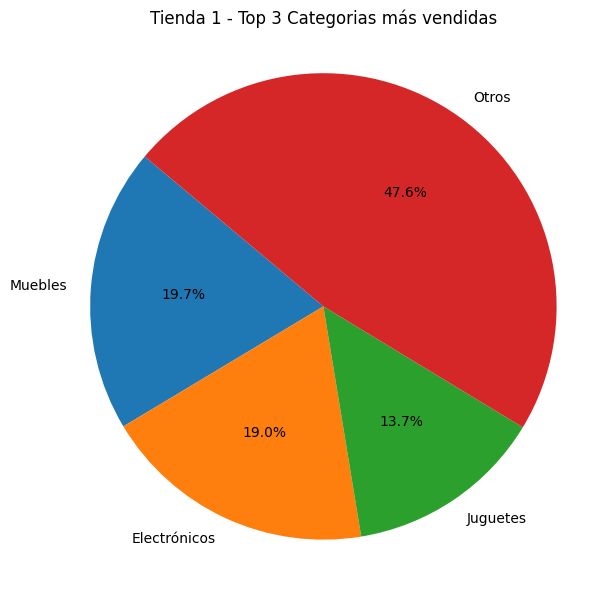

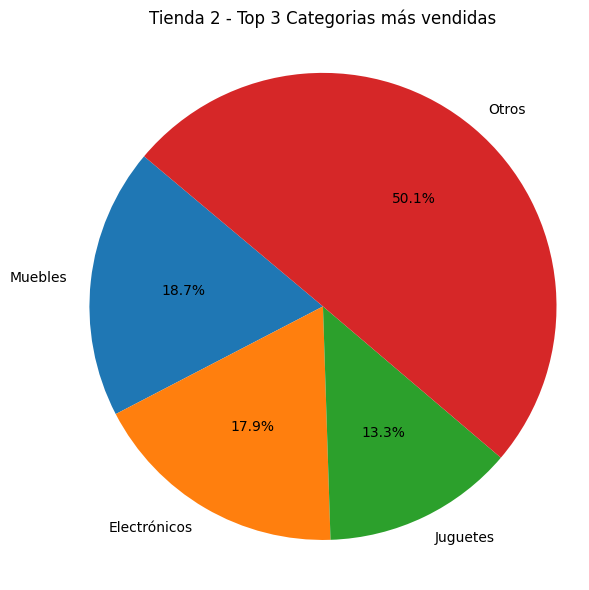

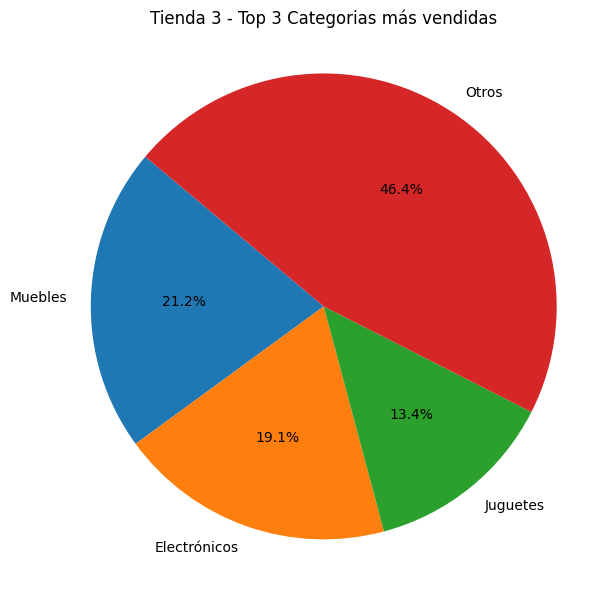

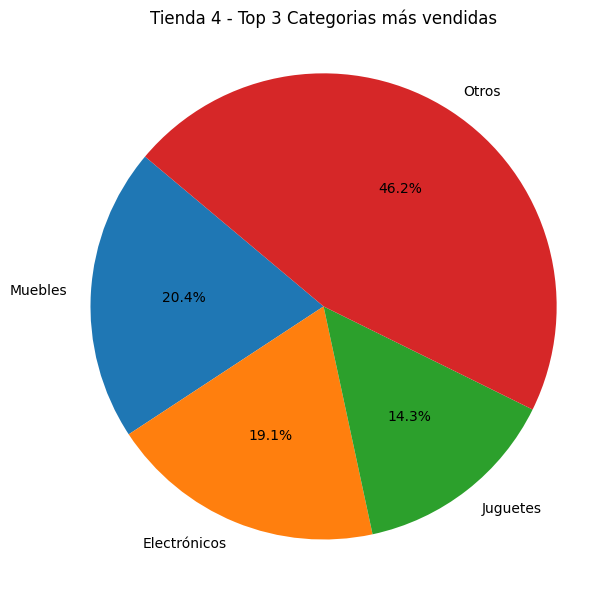

In [ ]:
"""
Usaremos un grafico circular (pastel)
para la visualización de las 3 categorías más vendidas en cada tienda.
"""
for nombre, data in tiendas.items():
  ventas_categoria = data.groupby("Categoría del Producto").size().sort_values(ascending=False)
  #top 3
  top_3 = ventas_categoria.head(3)
  resto = ventas_categoria.iloc[3:].sum()
  #datos para el piechart
  labels = list(top_3.index) + ["Otros"]
  sizes = list(top_3.values) + [resto]
  #grafico piechart
  plt.figure(figsize=(6, 6))
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
  plt.title(f"{nombre} - Top 3 Categorias más vendidas")
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

# 3. Calificación promedio de la tienda


Análisis general:

In [ ]:
# Calcular la calificación promedio por tienda
for nombre, datos in tiendas.items():
    promedio_calificacion = datos["Calificación"].mean()
    print(f"{nombre} - Calificación promedio: {promedio_calificacion:.2f}")

Tienda 1 - Calificación promedio: 3.98
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.00


Gráfico:

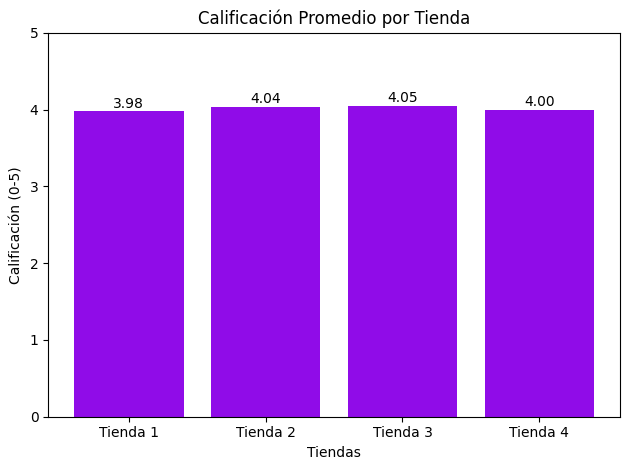

In [ ]:
# Crear gráfico de calificaciones promedio
promedios = [datos["Calificación"].mean() for datos in tiendas.values()]
nombres = list(tiendas.keys())

plt.bar(nombres, promedios, color='#900CE8')
plt.title("Calificación Promedio por Tienda")
plt.ylim(0, 5)
plt.xlabel("Tiendas")
plt.ylabel("Calificación (0-5)")

# Mostrar valores sobre las barras
for i, val in enumerate(promedios):
    plt.text(i, val + 0.05, f"{val:.2f}", ha='center')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

Análisis general:

In [ ]:
for nombre, datos in tiendas.items():
    ventas = datos.groupby("Producto").size().sort_values(ascending=False)
    #producto más vendido
    producto_mas = ventas.head(1)
    #producto menos vendido
    producto_menos = ventas.tail(1)

    print(f"{nombre}:")
    print(f"Más vendido: {producto_mas.index[0]} ({producto_mas.values[0]} ventas)")
    print(f"Menos vendido: {producto_menos.index[0]} ({producto_menos.values[0]} ventas)\n")


Tienda 1:
Más vendido: Armario (60 ventas)
Menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
Más vendido: Iniciando en programación (65 ventas)
Menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Más vendido: Kit de bancas (57 ventas)
Menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Más vendido: Cama box (62 ventas)
Menos vendido: Guitarra eléctrica (33 ventas)



Grafico:

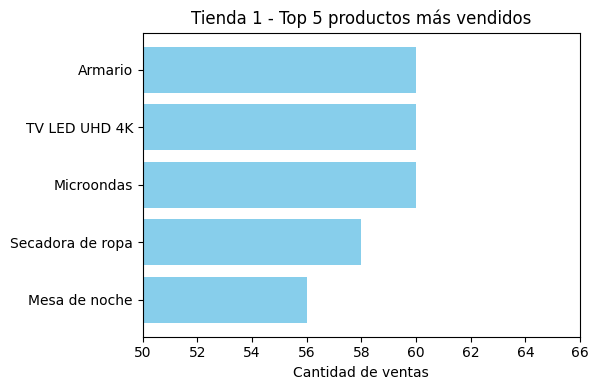

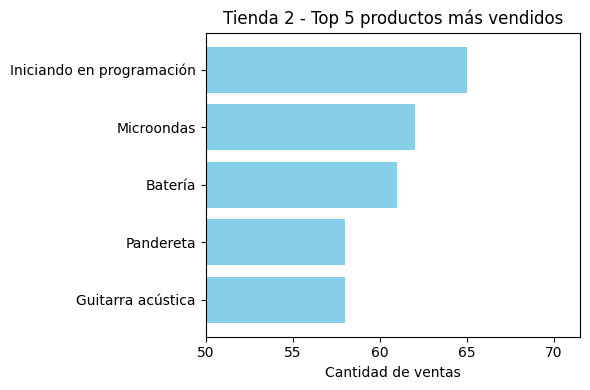

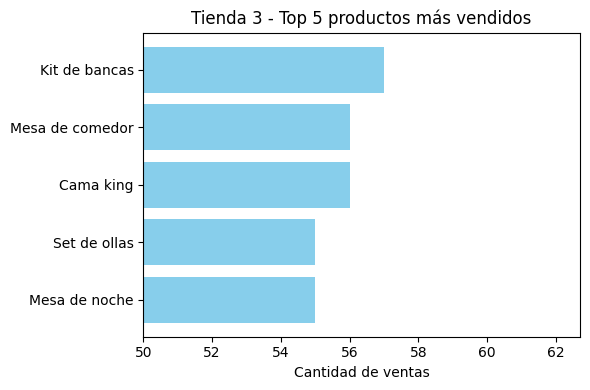

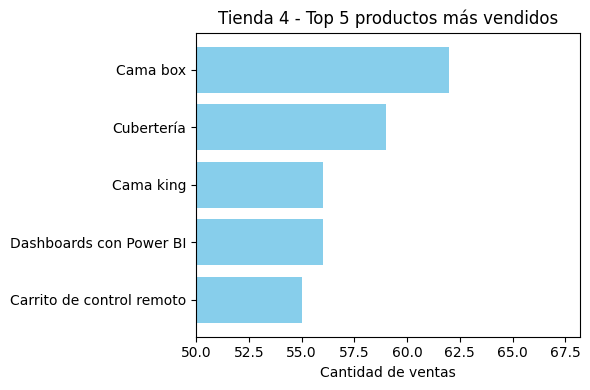

In [ ]:
# Gráfico de los 5 productos más vendidos de cada tienda
for nombre, datos in tiendas.items():
    ventas = datos.groupby("Producto").size().sort_values(ascending=False)
    top_5 = ventas.head(5)
    plt.figure(figsize=(6, 4))
    plt.barh(top_5.index[::-1], top_5.values[::-1], color='skyblue')
    plt.title(f"{nombre} - Top 5 productos más vendidos")
    plt.xlabel("Cantidad de ventas")
    plt.tight_layout()
    plt.xlim(50, max(top_5.values) * 1.1) #a partir de 50 unidades
    plt.show()

# 5. Envío promedio por tienda

Análisis general

In [ ]:
for nombre, datos in tiendas.items():
    promedio_envio = datos["Costo de envío"].mean()
    print(f"{nombre} - Costo de envío promedio: ${promedio_envio:.2f}")

Tienda 1 - Costo de envío promedio: $26018.61
Tienda 2 - Costo de envío promedio: $25216.24
Tienda 3 - Costo de envío promedio: $24805.68
Tienda 4 - Costo de envío promedio: $23459.46


Grafico

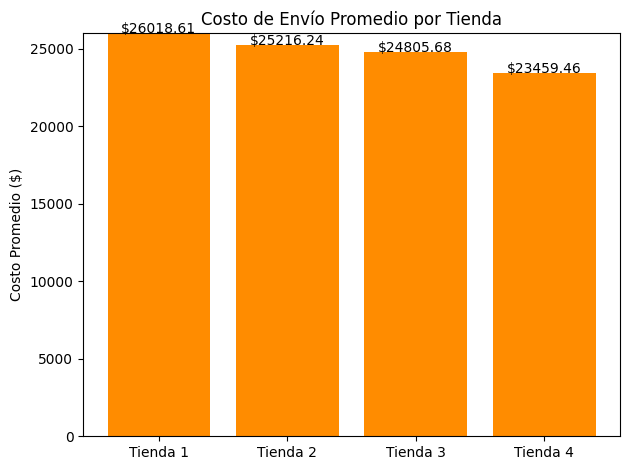

In [ ]:
# Obtener promedios de envío por tienda
promedios_envio = [datos["Costo de envío"].mean() for datos in tiendas.values()]
nombres_tiendas = list(tiendas.keys())

# Crear el gráfico
plt.bar(nombres_tiendas, promedios_envio, color='darkorange')
plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo Promedio ($)")
plt.ylim(0, max(promedios_envio) + 1)  # Ajusta el límite para mejor visualización

# Mostrar valores sobre las barras
for i, val in enumerate(promedios_envio):
    plt.text(i, val + 0.1, f"${val:.2f}", ha='center')

plt.tight_layout()
plt.show()

##Evaluación final:

###Introducción

El objetivo de este reto fue asesorar al Sr. Juan en la decisión de **cuál de sus cuatro tiendas vender**, con el fin de invertir en un nuevo emprendimiento. Se analizaron métricas clave de desempeño, como ingresos, satisfacción del cliente, variedad de productos vendidos y costos logísticos.

### Desarrollo del Análisis

1. **Ingresos Totales**  
   La Tienda 4 fue la que generó **menores ingresos**, lo cual es un indicador directo de bajo rendimiento comercial.

2. **Categorías de Productos Vendidos**  
   La Tienda 4 muestra **menos concentración de ventas** en las categorías líderes, indicando una menor fuerza en su mix de productos principales.

3. **Calificaciones Promedio de Clientes**  
   Las calificaciones de la Tienda 4 fueron **similares o ligeramente menores** a las de las otras tiendas, lo que sugiere oportunidades de mejora en calidad o servicio.

4. **Productos Más y Menos Vendidos**  
   La Tienda 4 **no destaca en productos más vendidos**, lo que puede afectar su rentabilidad y rotación de stock.

5. **Costo de Envío Promedio**  
   El costo promedio de envío de la Tienda 4 **no compensa su bajo ingreso**, por lo tanto no representa una ventaja competitiva.

### Conclusión

Con base en todos los factores analizados, **se recomienda vender la Tienda 4**. Es la tienda con **el menor desempeño en términos de ingresos y rotación de productos**, sin compensarlo con mejor satisfacción del cliente o ventajas logísticas.

Esto permitirá al Sr. Juan enfocarse en las tiendas con mejor rendimiento, diversificación y potencial de crecimiento.